In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Reading The file
bike=pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Checks

In [4]:
#Checking number of rows and columns
bike.shape

(730, 16)

In [5]:
#Checking DataSet
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking Nulls
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Data Preparation and visualisation

In [7]:
#Dropping Instant as it's a index
bike.drop(['instant'],axis=1,inplace=True)

In [8]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#casual and registered columns are togather giving cnt and cnt is already given,So we should drop these columns
dropped_colums=['casual','registered']
bike.drop(dropped_colums,axis=1,inplace=True)

In [10]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#I think we should drop dteday also as we have 2 seperate columns yr and month
bike.drop(['dteday'],axis=1,inplace=True)

In [12]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


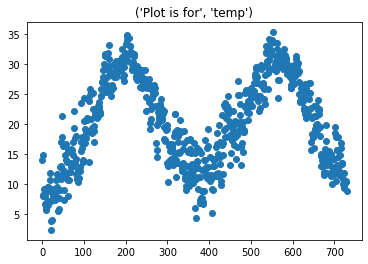

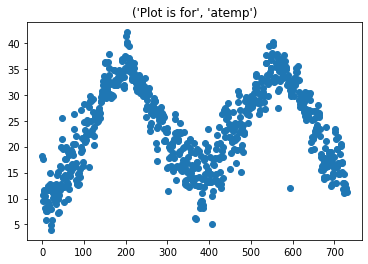

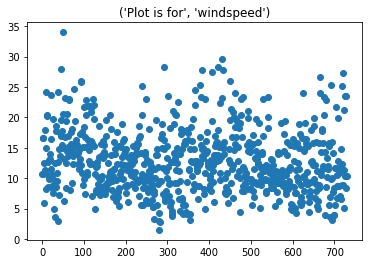

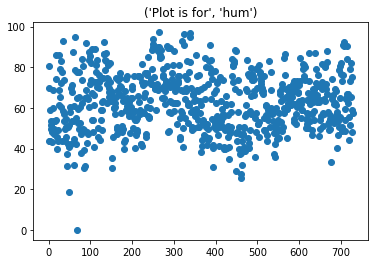

In [13]:
#Checking outliers
columns=['temp','atemp','windspeed','hum']
for i in columns:
    title='Plot is for',i
    plt.scatter(bike.index,bike[i])
    plt.title(title)
    plt.show()

In [14]:
#Let's check windspeed
bike.windspeed.quantile([0.25,0.50,0.75,0.99,1])

0.25     9.041650
0.50    12.125325
0.75    15.625589
0.99    27.380948
1.00    34.000021
Name: windspeed, dtype: float64

infer: It's possible.Data Seems to be normal

In [15]:
#Mapping Data for Categorical Variables 
bike['weathersit']=bike['weathersit'].map({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})

In [16]:
bike['weekday']=bike['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [17]:
bike['season']=bike['season'].map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [18]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


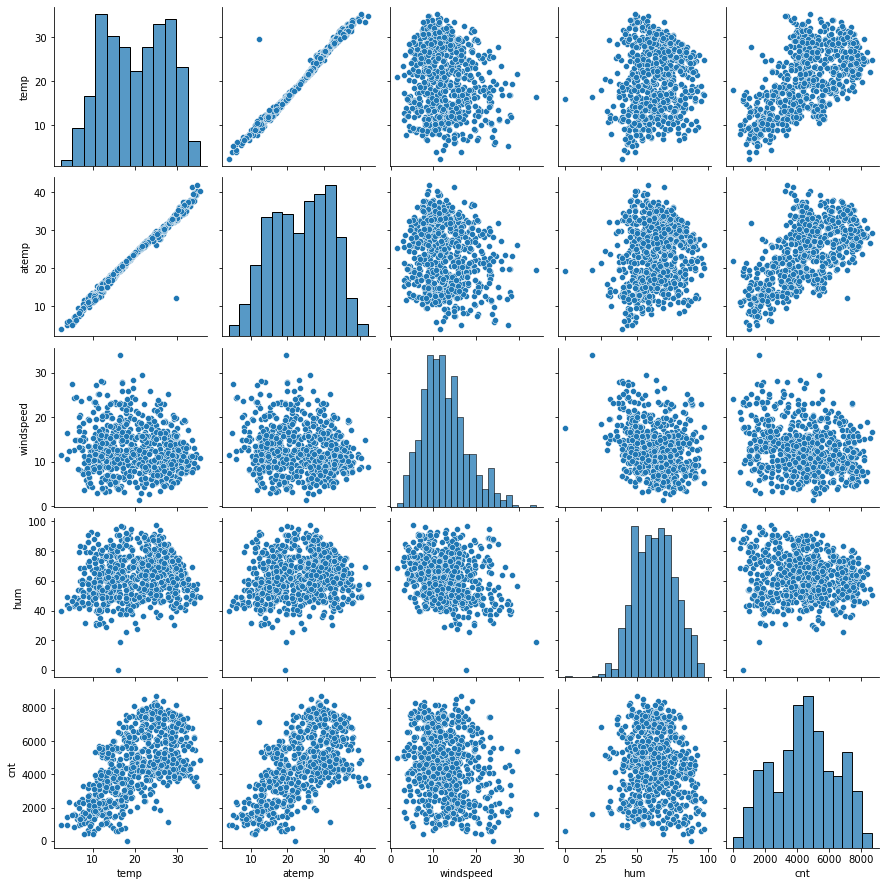

In [19]:
#PairPlot
sns.pairplot(bike,vars=['temp','atemp','windspeed','hum','cnt'])
plt.show()

In [20]:
#Fixing DataType 
bike['mnth']=bike['mnth'].astype(object)
bike['season']=bike['season'].astype(object)
bike['weathersit']=bike['weathersit'].astype(object)
bike['weekday']=bike['weekday'].astype(object)

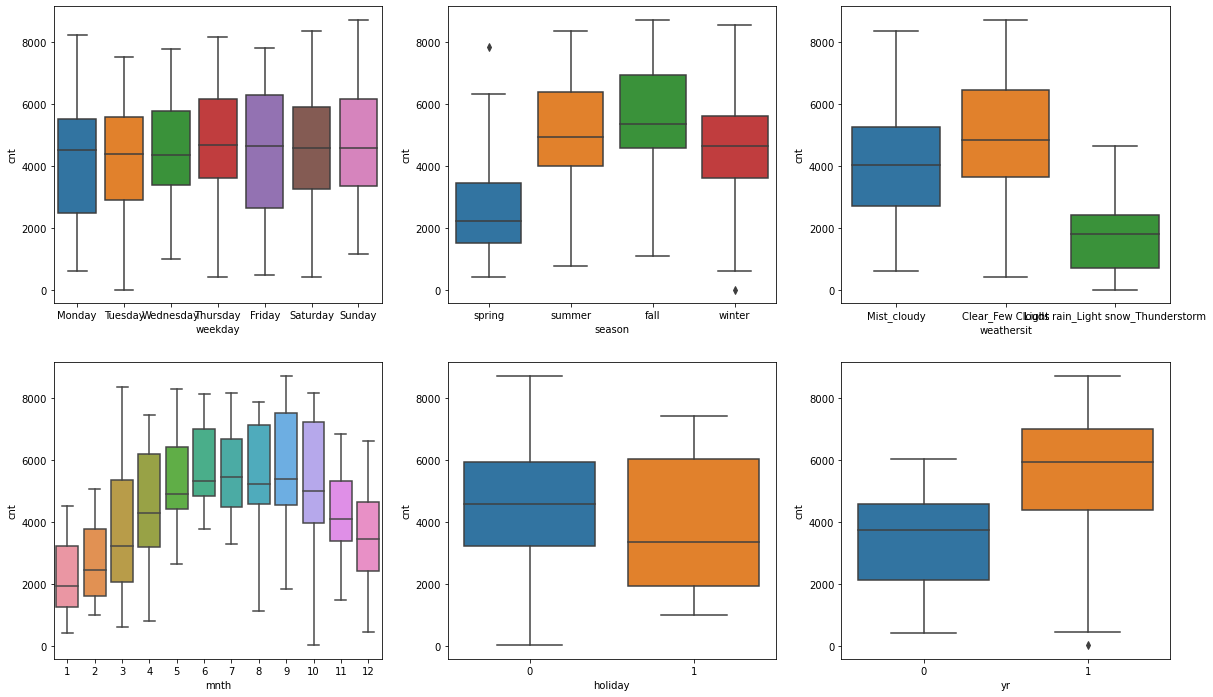

In [21]:
#Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(2,3,5)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(2,3,6)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.show()

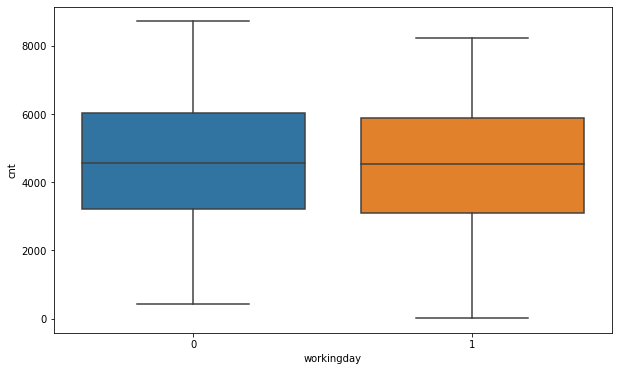

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.show()

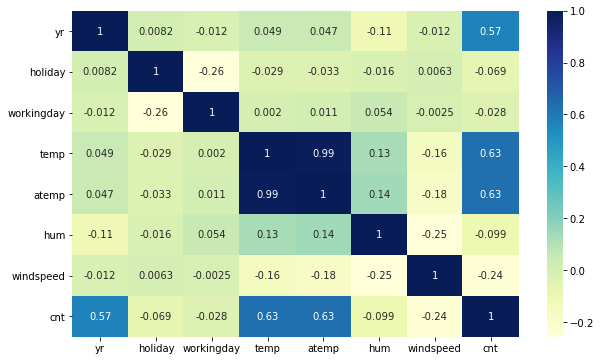

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(bike.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [24]:
# There is a very high cor-relation between temp and a temp,so dropping temp
bike.drop(['temp'],axis=1,inplace=True)

### Creating Dummy Variables 

In [25]:
# Create Dummy variables and Let's drop the first column from status df using 'drop_first = True'
season_dummy= pd.get_dummies(bike['season'],drop_first=True)
mnth_dummy=pd.get_dummies(bike['mnth'],drop_first=True)
days_of_week_dummy=pd.get_dummies(bike['weekday'],drop_first=True)
weather_dummy=pd.get_dummies(bike['weathersit'],drop_first=True)

In [26]:
#Add the result to the original bike dataframe
bike=pd.concat([bike,season_dummy,mnth_dummy,days_of_week_dummy,weather_dummy],axis=1)

In [27]:
#Drop season,weathersit,weekday and mnth as we have created dummy variable
bike.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)

In [28]:
#To display all columns
pd.set_option('display.max_columns',500)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting the Data

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [31]:
#Apply Scaler to all columns except dummy variables
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

<ipython-input-31-be2b1f40be50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
C:\Users\Prabhat\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [32]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#Creating x and y for Model Building
y_train = df_train.pop('cnt')
X_train = df_train

# Building a Linear Model

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
#Using RFE 
#creating instance
lm=LinearRegression()
#Fit the model
lm.fit(X_train,y_train)

rfe=RFE(lm,15)  #runnung RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\Prabhat\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 12),
 ('Monday', False, 10),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1)]

In [37]:
col=X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',            2,            7,           10,
                 11,           12,     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday'],
      dtype='object')

### Buiding model using statsmodel,for the detailed statics

In [39]:
#Using selected variable for Model Buiding
x_train_rfe=X_train[col]

In [40]:
import statsmodels.api as sm
x_train_rfe1=sm.add_constant(x_train_rfe)

In [41]:
lm=sm.OLS(y_train,x_train_rfe1).fit()

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          8.06e-186
Time:                        07:09:59   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2995      0.034      8.909      0.000       0.233       0.366
yr                                     0.2320      0.008     28.268      0.000       0.216       0.248
holiday                               -0.0845      0.026     -3.266      0.001      -0.135      -0.034
atemp                                  0.4597      0.033     13.757      0.000       0.394       0.525
hum                                   -0.1599      0.038     -4.156      0.000      -0.236      -0.084
windspeed                             -0.1613      0.026     -6.170      0.000      -0.213      -0.110
spring                                -0.0757      0.019     -4.061      0.000      -0.112      -0.039
winter                                 0.1024      0.016      6.301      0.000       0.070       0.134
3                                      0.0585      0.015      3.852      0.000       0.029       0.088
4                                      0.0591      0.020      2.948      0.003       0.020       0.099
5                                      0.0922      0.019      4.906      0.000       0.055       0.129
6                                      0.0583      0.019      3.017      0.003       0.020       0.096
8                                      0.0608      0.018      3.362      0.001       0.025       0.096
9                                      0.1175      0.017      6.719      0.000       0.083       0.152
Light rain_Light snow_Thunderstorm    -0.2359      0.027     -8.833      0.000      -0.288      -0.183
Mist_cloudy                           -0.0568      0.011     -5.347      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       60.719   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.007
Skew:                          -0.591   Prob(JB):                     6.62e-36
Kurtosis:                       5.496   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
14,Mist_cloudy,2.26
0,yr,2.08
11,8,1.90
9,5,1.77
8,4,1.68


In [44]:
#Here, we can see that humidity have very high vif,we means high mutlticolinrarity,so we should drop it
x_train_rfe=x_train_rfe.drop(['hum'],axis=1)

In [45]:
x_train_rfe2=sm.add_constant(x_train_rfe)

In [46]:
lm2=sm.OLS(y_train,x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.75e-183
Time:                        07:10:00   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2151      0.027      7.900      0.000       0.162       0.269
yr                                     0.2355      0.008     28.377      0.000       0.219       0.252
holiday                               -0.0854      0.026     -3.248      0.001      -0.137      -0.034
atemp                                  0.4298      0.033     12.960      0.000       0.365       0.495
windspeed                             -0.1332      0.026     -5.189      0.000      -0.184      -0.083
spring                                -0.0815      0.019     -4.310      0.000      -0.119      -0.044
winter                                 0.0911      0.016      5.597      0.000       0.059       0.123
3                                      0.0597      0.015      3.871      0.000       0.029       0.090
4                                      0.0597      0.020      2.930      0.004       0.020       0.100
5                                      0.0817      0.019      4.316      0.000       0.045       0.119
6                                      0.0628      0.020      3.199      0.001       0.024       0.101
8                                      0.0594      0.018      3.235      0.001       0.023       0.096
9                                      0.1118      0.018      6.311      0.000       0.077       0.147
Light rain_Light snow_Thunderstorm    -0.2799      0.025    -11.234      0.000      -0.329      -0.231
Mist_cloudy                           -0.0820      0.009     -9.252      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       61.552   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.196
Skew:                          -0.618   Prob(JB):                     1.99e-34
Kurtosis:                       5.404   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
10,8,1.86
9,6,1.64
8,5,1.60
13,Mist_cloudy,1.55
7,4,1.54


In [48]:
#Dropping atemp as it has high vif
x_train_rfe=x_train_rfe.drop(['atemp'],axis=1)

In [49]:
x_train_rfe3=sm.add_constant(x_train_rfe)

In [50]:
lm3=sm.OLS(y_train,x_train_rfe3).fit()


In [51]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          3.90e-153
Time:                        07:10:02   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5082      0.018     28.983      0.000       0.474       0.543
yr                                     0.2479      0.010     26.013      0.000       0.229       0.267
holiday                               -0.0886      0.030     -2.916      0.004      -0.148      -0.029
windspeed                             -0.1645      0.030     -5.566      0.000      -0.223      -0.106
spring                                -0.2392      0.017    -14.308      0.000      -0.272      -0.206
winter                                -0.0080      0.017     -0.482      0.630      -0.041       0.025
3                                      0.0494      0.018      2.772      0.006       0.014       0.084
4                                     -0.0153      0.023     -0.676      0.499      -0.060       0.029
5                                      0.0671      0.022      3.072      0.002       0.024       0.110
6                                      0.0901      0.023      3.995      0.000       0.046       0.134
8                                      0.0929      0.021      4.418      0.000       0.052       0.134
9                                      0.1318      0.020      6.456      0.000       0.092       0.172
Light rain_Light snow_Thunderstorm    -0.2896      0.029    -10.056      0.000      -0.346      -0.233
Mist_cloudy                           -0.0943      0.010     -9.257      0.000      -0.114      -0.074
==============================================================================
Omnibus:                       35.107   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.924
Skew:                          -0.372   Prob(JB):                     7.28e-18
Kurtosis:                       4.777   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
12,Mist_cloudy,1.54
6,4,1.48
7,5,1.32
5,3,1.31
9,8,1.31
8,6,1.24


In [53]:
#Windspeed have high vif ,so need to drop it,as we all know that vif should be less than 2.
x_train_rfe=x_train_rfe.drop(['windspeed'],axis=1)

In [54]:
x_train_rfe4=sm.add_constant(x_train_rfe)
lm4=sm.OLS(y_train,x_train_rfe4).fit()

In [55]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          9.96e-148
Time:                        07:10:03   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [56]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
11,Mist_cloudy,1.53
2,spring,1.48
3,winter,1.39
4,3,1.23
8,8,1.17
5,4,1.14
6,5,1.14
9,9,1.12
7,6,1.08


In [57]:
#Here,Again we can see that p-values of winter is high,so drop it.
x_train_rfe=x_train_rfe.drop(['winter'],axis=1)

In [58]:
x_train_rfe5=sm.add_constant(x_train_rfe)
lm5=sm.OLS(y_train,x_train_rfe5).fit()

In [59]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          9.28e-149
Time:                        07:10:04   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [60]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
2,spring,1.41
10,Mist_cloudy,1.39
3,3,1.23
7,8,1.13
4,4,1.11
5,5,1.11
8,9,1.11
6,6,1.07
1,holiday,1.03


In [61]:
# 4 has high p-value,dropping it
x_train_rfe=x_train_rfe.drop([4],axis=1)

In [62]:
x_train_rfe6=sm.add_constant(x_train_rfe)
lm6=sm.OLS(y_train,x_train_rfe6).fit()

In [63]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.76e-149
Time:                        07:10:05   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [64]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
9,Mist_cloudy,1.36
3,3,1.22
6,8,1.12
4,5,1.10
7,9,1.10
5,6,1.06
1,holiday,1.03
8,Light rain_Light snow_Thunderstorm,1.02


### Improving Model
. Let's start adding variables to improvise model

In [65]:
#Adding work
x_train_rfe['workingday']=X_train['workingday']

In [66]:
x_train_rfe7=sm.add_constant(x_train_rfe)
lm7=sm.OLS(y_train,x_train_rfe7).fit()

In [67]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.3
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.76e-149
Time:                        07:10:07   Log-Likelihood:                 409.03
No. Observations:                 510   AIC:                            -794.1
Df Residuals:                     498   BIC:                            -743.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [68]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,2.14
0,yr,1.73
2,spring,1.50
9,Mist_cloudy,1.42
3,3,1.23
6,8,1.16
4,5,1.15
7,9,1.14
5,6,1.12
1,holiday,1.05


In [69]:
#vif of working is greater than 2,so dropping it
x_train_rfe=x_train_rfe.drop(['workingday'],axis=1)

In [70]:
#Adding Sunday
x_train_rfe['Sunday']=X_train['Sunday']

In [71]:
x_train_rfe8=sm.add_constant(x_train_rfe)
lm8=sm.OLS(y_train,x_train_rfe8).fit()

In [72]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.28e-148
Time:                        07:10:09   Log-Likelihood:                 407.44
No. Observations:                 510   AIC:                            -790.9
Df Residuals:                     498   BIC:                            -740.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [73]:
# P-value is high,so we drop it
x_train_rfe=x_train_rfe.drop(['Sunday'],axis=1)

In [74]:
#Adding Saturday
x_train_rfe['Saturday']=X_train['Saturday']

In [75]:
x_train_rfe9=sm.add_constant(x_train_rfe)
lm9=sm.OLS(y_train,x_train_rfe9).fit()

In [76]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.0
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.58e-148
Time:                        07:10:10   Log-Likelihood:                 407.23
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     498   BIC:                            -739.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [77]:
#Drop saturday as p-value is high
x_train_rfe=x_train_rfe.drop(['Saturday'],axis=1)

In [78]:
#ADDING Tuesday
x_train_rfe['Tuesday']=X_train['Tuesday']

In [79]:
x_train_rfe10=sm.add_constant(x_train_rfe)
lm10=sm.OLS(y_train,x_train_rfe10).fit()

In [80]:
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          8.86e-149
Time:                        07:10:11   Log-Likelihood:                 407.82
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [81]:
#Dropping Tuesday as p-value is little high
x_train_rfe=x_train_rfe.drop(['Tuesday'],axis=1)

In [82]:
#Adding Monday
x_train_rfe['Monday']=X_train['Monday']

In [83]:
x_train_rfe11=sm.add_constant(x_train_rfe)
lm11=sm.OLS(y_train,x_train_rfe11).fit()

In [84]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          3.54e-149
Time:                        07:10:12   Log-Likelihood:                 408.77
No. Observations:                 510   AIC:                            -793.5
Df Residuals:                     498   BIC:                            -742.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [85]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.53
2,spring,1.41
9,Mist_cloudy,1.37
3,3,1.22
6,8,1.13
10,Monday,1.12
7,9,1.11
4,5,1.10
5,6,1.07
1,holiday,1.03


In [86]:
#Adding Thursday
x_train_rfe['Thursday']=X_train['Thursday']

In [87]:
x_train_rfe12=sm.add_constant(x_train_rfe)
lm12=sm.OLS(y_train,x_train_rfe12).fit()

In [88]:
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.71e-148
Time:                        07:10:13   Log-Likelihood:                 409.27
No. Observations:                 510   AIC:                            -792.5
Df Residuals:                     497   BIC:                            -737.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [89]:
#Dropping Thursday,p-value is high
x_train_rfe=x_train_rfe.drop(['Thursday'],axis=1)

In [90]:
#Adding Wednesday
x_train_rfe['Wednesday']=X_train['Wednesday']

In [91]:
x_train_rfe14=sm.add_constant(x_train_rfe)
lm14=sm.OLS(y_train,x_train_rfe14).fit()

In [92]:
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     135.6
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          3.70e-148
Time:                        07:10:15   Log-Likelihood:                 408.95
No. Observations:                 510   AIC:                            -791.9
Df Residuals:                     497   BIC:                            -736.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [93]:
x_train_rfe=x_train_rfe.drop(['Wednesday'],axis=1)

In [94]:
#Adding Summer
x_train_rfe['summer']=X_train['summer']

In [95]:
x_train_rfe15=sm.add_constant(x_train_rfe)
lm15=sm.OLS(y_train,x_train_rfe15).fit()

In [96]:
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.5
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          4.61e-151
Time:                        07:10:16   Log-Likelihood:                 415.85
No. Observations:                 510   AIC:                            -805.7
Df Residuals:                     497   BIC:                            -750.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [97]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,summer,2.40
4,5,1.74
0,yr,1.60
2,spring,1.53
9,Mist_cloudy,1.41
3,3,1.37
5,6,1.27
6,8,1.14
10,Monday,1.14
7,9,1.12


In [98]:
#Vif is more than 2, so dropping it.
x_train_rfe=x_train_rfe.drop(['summer'],axis=1)

In [99]:
#Adding 2
x_train_rfe[2]=X_train[2]

In [100]:
x_train_rfe16=sm.add_constant(x_train_rfe)
lm16=sm.OLS(y_train,x_train_rfe16).fit()

In [101]:
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          4.23e-148
Time:                        07:10:18   Log-Likelihood:                 408.81
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     497   BIC:                            -736.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [102]:
# P-value is quite high,drop 2
x_train_rfe=x_train_rfe.drop(2,1)

In [103]:
x_train_rfe[7]=X_train[7]

In [104]:
x_train_rfe17=sm.add_constant(x_train_rfe)
lm17=sm.OLS(y_train,x_train_rfe17).fit()

In [105]:
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     144.4
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.28e-153
Time:                        07:10:19   Log-Likelihood:                 421.33
No. Observations:                 510   AIC:                            -816.7
Df Residuals:                     497   BIC:                            -761.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [106]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
2,spring,1.43
9,Mist_cloudy,1.37
3,3,1.23
6,8,1.14
10,Monday,1.14
4,5,1.11
7,9,1.11
5,6,1.08
11,7,1.08


In [107]:
#Adding 10
x_train_rfe[10]=X_train[10]

In [108]:
x_train_rfe18=sm.add_constant(x_train_rfe)
lm18=sm.OLS(y_train,x_train_rfe18).fit()

In [109]:
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.5
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.31e-160
Time:                        07:10:21   Log-Likelihood:                 440.59
No. Observations:                 510   AIC:                            -853.2
Df Residuals:                     496   BIC:                            -793.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [110]:
vif = pd.DataFrame()
X=x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.45
9,Mist_cloudy,1.42
3,3,1.23
12,10,1.16
6,8,1.15
10,Monday,1.15
7,9,1.13
4,5,1.12
11,7,1.09


In [111]:
#Adding 11
x_train_rfe[11]=X_train[11]

In [112]:
x_train_rfe19=sm.add_constant(x_train_rfe)
lm19=sm.OLS(y_train,x_train_rfe19).fit()

In [113]:
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     136.0
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.04e-159
Time:                        07:10:22   Log-Likelihood:                 440.94
No. Observations:                 510   AIC:                            -851.9
Df Residuals:                     495   BIC:                            -788.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [114]:
x_train_rfe=x_train_rfe.drop(11,1)

In [115]:
#Adding 12
x_train_rfe[12]=X_train[12]

In [116]:
x_train_rfe20=sm.add_constant(x_train_rfe)
lm20=sm.OLS(y_train,x_train_rfe20).fit()

In [117]:
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.84e-159
Time:                        07:10:23   Log-Likelihood:                 440.59
No. Observations:                 510   AIC:                            -851.2
Df Residuals:                     495   BIC:                            -787.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [118]:
#P-value is high ,dropping 12
x_train_rfe=x_train_rfe.drop(12,1)

# Residual Analysis

In [119]:
#Ou of All Model model18 is best,so Proceeding with that.
y_train_cnt = lm18.predict(x_train_rfe18)

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   

C:\Users\Prabhat\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

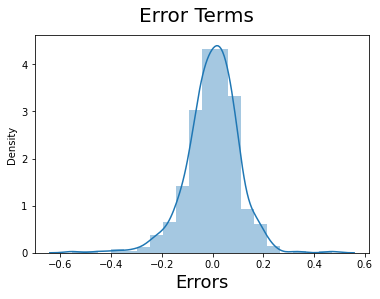

In [121]:
#Checking Assumption by plotting distribution of error terms
fig = plt.figure()
sns.distplot((y_train-y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

# Making Prediction using Final Model 

In [122]:
#checking columns
x_train_rfe18.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                          7,
                                         10],
      dtype='object')

In [123]:
x_train_rfe18.shape

(510, 14)

In [124]:
#Scaling the Test Data
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

<ipython-input-124-d3c22b6be028>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
C:\Users\Prabhat\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [125]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [126]:
X_train_new=x_train_rfe18.drop(['const'], axis=1)

In [127]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [128]:
#Making predictions on the chosen model

y_pred = lm18.predict(X_test_new)

Text(0, 0.5, 'y_pred')

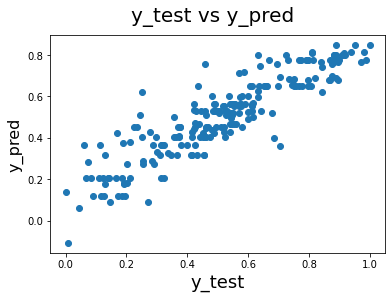

In [129]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [131]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred)
r_squared

0.7972412766284444

In [132]:
X_t=X_train_new.iloc[:,0].values

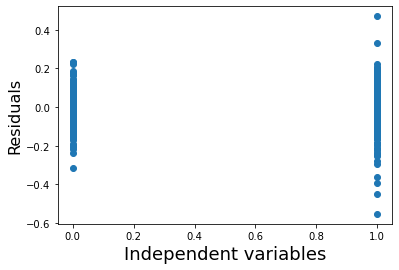

In [134]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
res=y_train - y_train_cnt
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [135]:
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.5
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          2.31e-160
Time:                        07:12:44   Log-Likelihood:                 440.59
No. Observations:                 510   AIC:                            -853.2
Df Residuals:                     496   BIC:                            -793.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons


We can see that the equation of our best fitted line is:

$ cnt = 0.2462  \times  yr + (-0.0807)  \times  holiday + (-0.1982) \times spring + 0.0647 \times 3 + 0.1214 \times 5 + 0.1490 \times 6 + 0.1564 \times 8 + 0.1947 \times 9 + (-0.3146) \times Light rain_Light snow_Thunderstorm + (-0.0894)\times Mist_cloudy +(-0.0305) \times Monday +(0.1257) \times 7 + (0.1141) \times 10 $


# Demand is higher in Month of 3,5,6,7,8,9,10